In [102]:
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
import imblearn
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from statsmodels.compat.python import lzip

In [103]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical/medical_clean.csv')

In [104]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [105]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [106]:
def custom_corr_matrix(df, title):
    fig = plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=df.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(df))
    #plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w')
    plt.show()

In [107]:
def plot_histogram(c):
    df_yes = df[df.ReAdmis_Yes==1][c]
    df_no = df[df.ReAdmis_Yes==0][c]
    yes_mean = df_yes.mean();
    no_mean = df_no.mean();
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([df_yes,df_no], bins=5, stacked=True)
    ax.legend(['ReAdmis - Yes','ReAdmis - No'])
    ymin, ymax = ax.get_ylim();
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='blue', lw=2) # yes mean
    ax.axvline(no_mean, color='orangered', lw=2) # no mean
    ax.text((xmax-xmin)/2,
        (ymax-ymin)/2,
        'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
        bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c)
    plt.ylabel('# ReAdmis')
    plt.show()

In [108]:
def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [109]:
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [110]:
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [111]:
df.columns.duplicated().any()

False

In [112]:
df.duplicated().any()

False

In [113]:
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1'],axis = 1,inplace=True)

In [114]:
df.drop(['City','State','County','Zip','Lat','Lng','Population','TimeZone'],axis = 1,inplace=True)

In [115]:
df.drop(['Additional_charges','TotalCharge','Services','Interaction','UID'],axis = 1,inplace=True)

In [116]:
df.drop(['Customer_id','Job','CaseOrder'],axis = 1, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Children            10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   ReAdmis             10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Soft_drink          10000 non-null  object 
 12  Initial_admin       10000 non-null  object 
 13  HighBlood           10000 non-null  object 
 14  Stroke              10000 non-null  object 
 15  Complication_risk   10000 non-null  object 
 16  Overw

In [118]:
target = 'ReAdmis'
for idx, c in enumerate(df.loc[:, df.columns == target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
        for idx,name in enumerate(df[c].value_counts().index.tolist()):
            print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    else:
        print('\n{}. {} is numerical.'.format(idx+1, c))


1. ReAdmis is categorical: ['No' 'Yes'].
	No      :  6331
	Yes     :  3669


In [119]:
df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])

In [120]:
df['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

In [121]:
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
        #for idx,name in enumerate(df[c].value_counts().index.tolist()):
            # print('\t{:<20}:{:>6}'.format(name,df[c].value_counts()[idx]))
        #print('{}'.format(df[c].describe()))
    else:
        print('\n{}. {} is numerical.'.format(idx+1, c))


1. Area is categorical: ['Suburban' 'Urban' 'Rural'].

2. Children is numerical.

3. Age is numerical.

4. Income is numerical.

5. Marital is categorical: ['Not_Married' 'Married'].

6. Gender is categorical: ['Male' 'Female' 'Nonbinary'].

7. VitD_levels is numerical.

8. Doc_visits is numerical.

9. Full_meals_eaten is numerical.

10. vitD_supp is numerical.

11. Soft_drink is categorical: ['No' 'Yes'].

12. Initial_admin is categorical: ['Emergency Admission' 'Elective Admission' 'Observation Admission'].

13. HighBlood is categorical: ['Yes' 'No'].

14. Stroke is categorical: ['No' 'Yes'].

15. Complication_risk is categorical: ['Medium' 'High' 'Low'].

16. Overweight is categorical: ['No' 'Yes'].

17. Arthritis is categorical: ['Yes' 'No'].

18. Diabetes is categorical: ['Yes' 'No'].

19. Hyperlipidemia is categorical: ['No' 'Yes'].

20. BackPain is categorical: ['Yes' 'No'].

21. Anxiety is categorical: ['Yes' 'No'].

22. Allergic_rhinitis is categorical: ['Yes' 'No'].

23. Ref

In [122]:
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [123]:
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days'],
      dtype='object')


No     6331
Yes    3669
Name: ReAdmis, dtype: int64


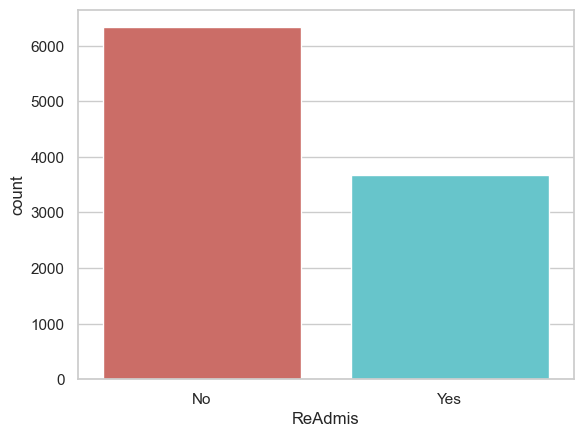

In [124]:
print(df[target].value_counts())
sb.countplot(x=target, data=df, palette='hls')
plt.show()

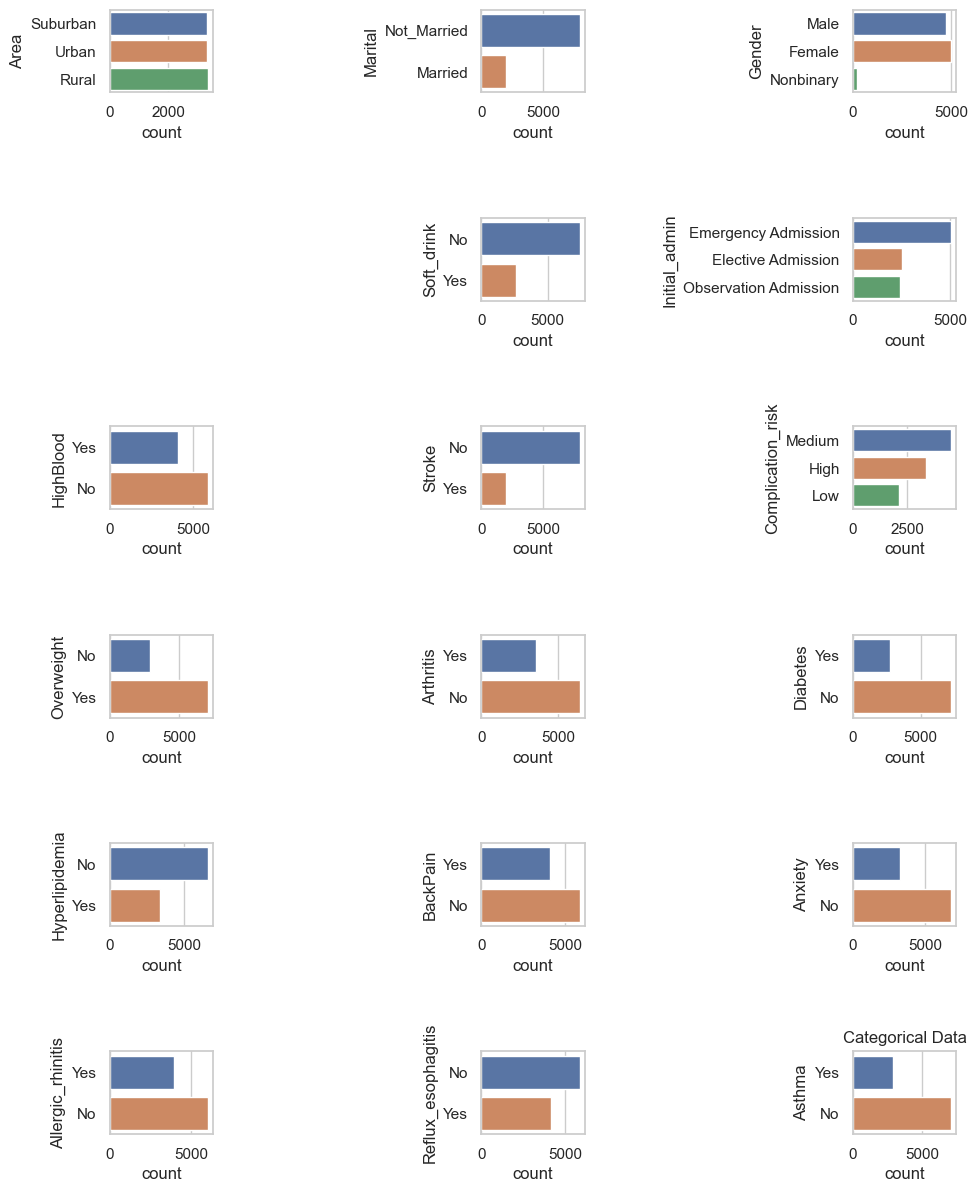

In [125]:
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(CategoricalData):
    if col != target:
        plt.subplot(10, 3, i+1)
        ax = sb.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Data')
plt.show()

<AxesSubplot: xlabel='Asthma'>

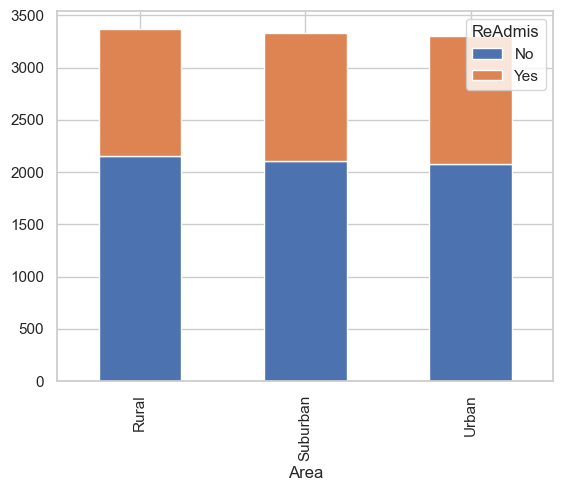

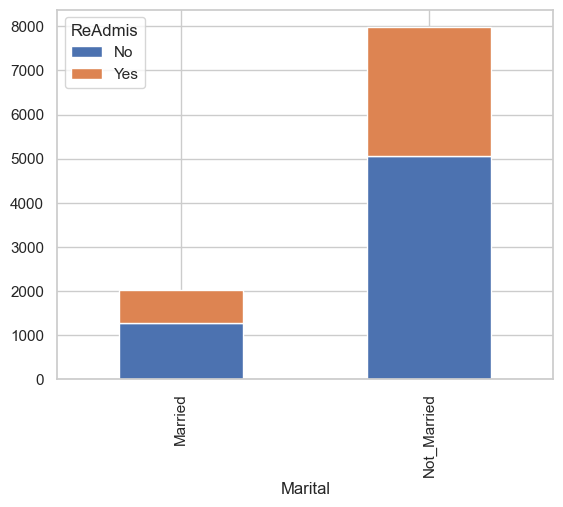

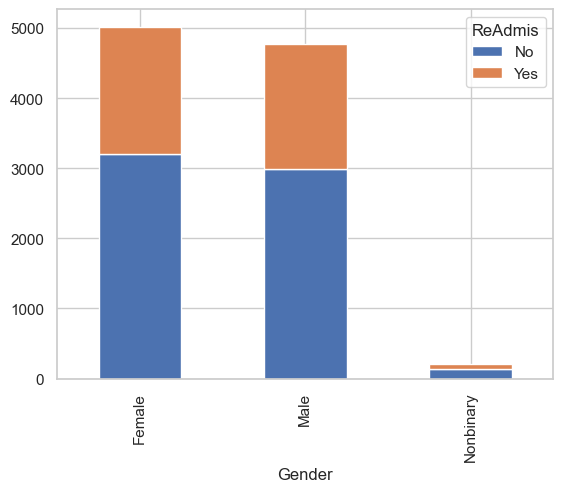

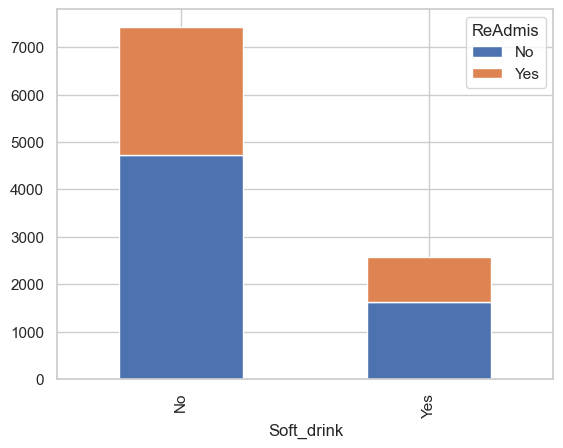

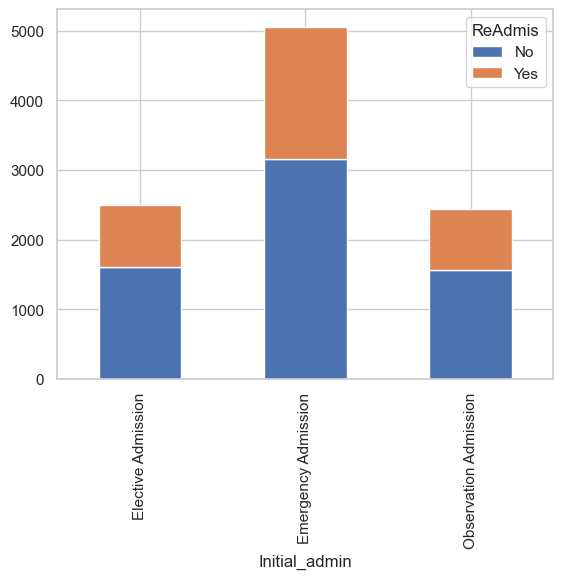

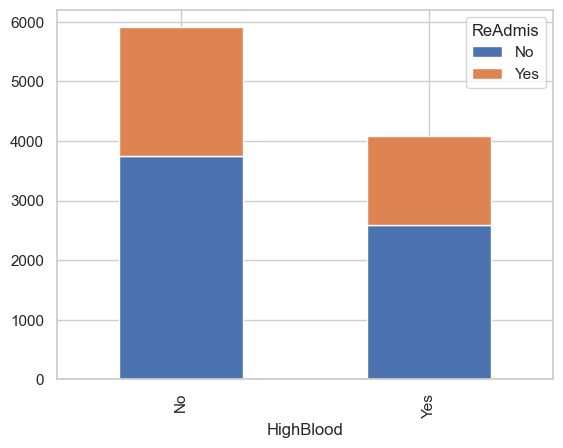

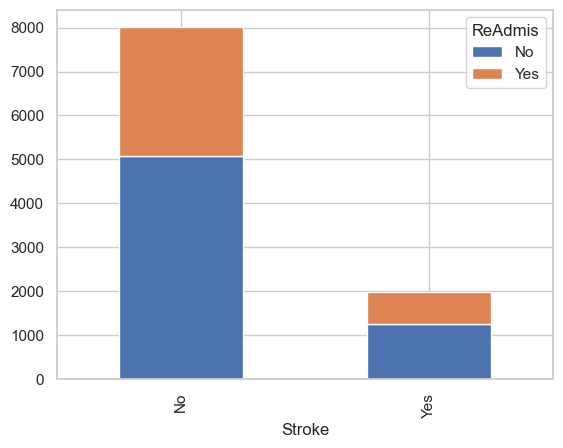

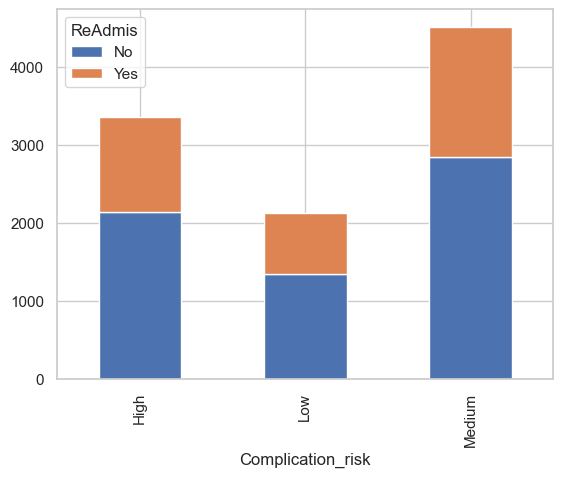

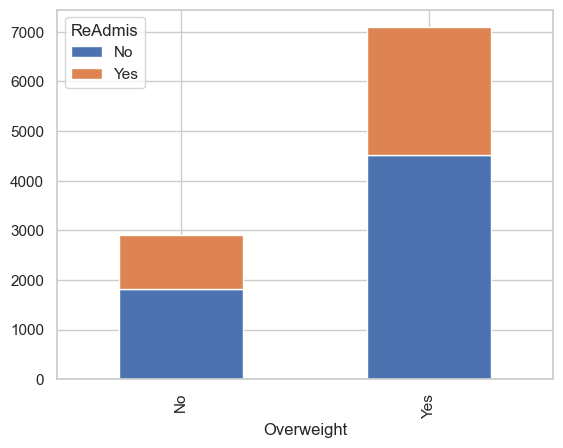

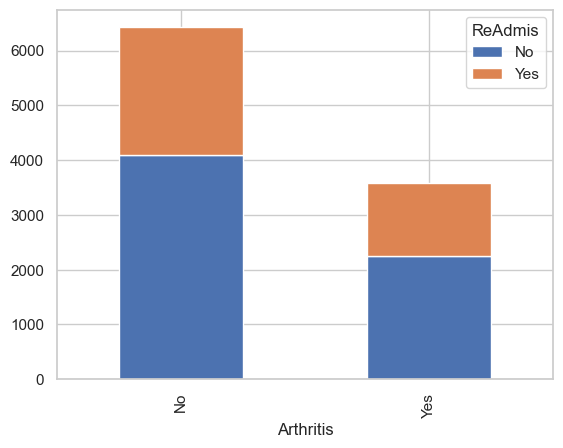

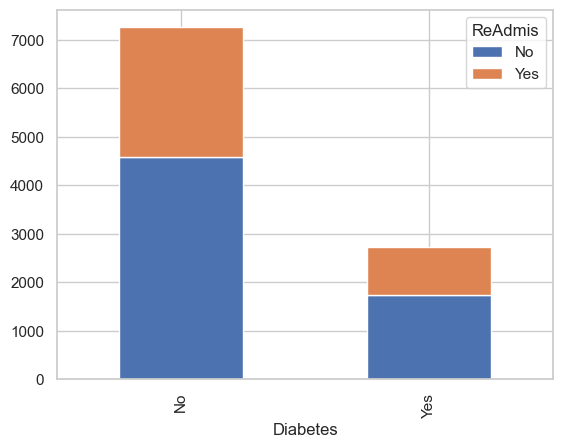

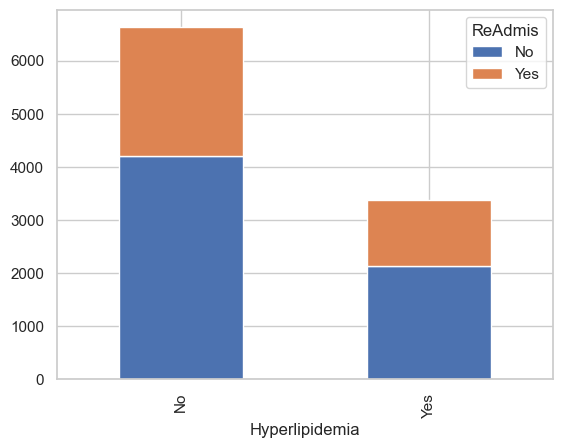

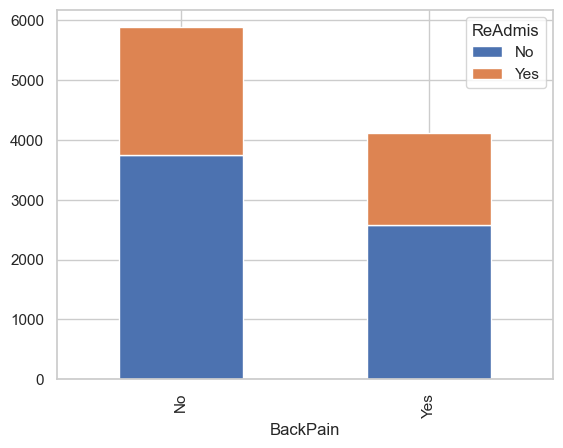

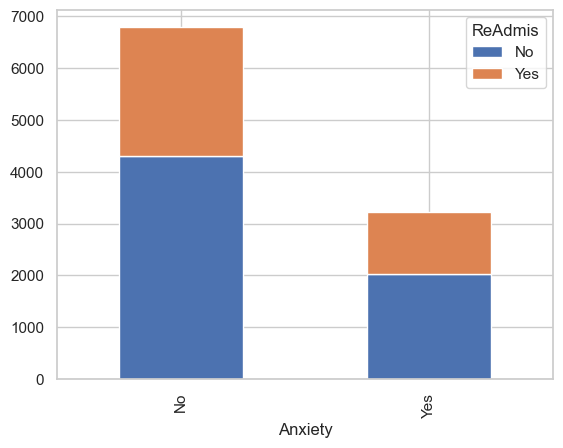

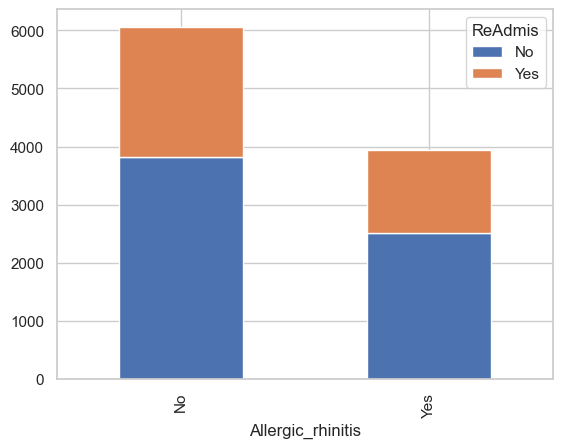

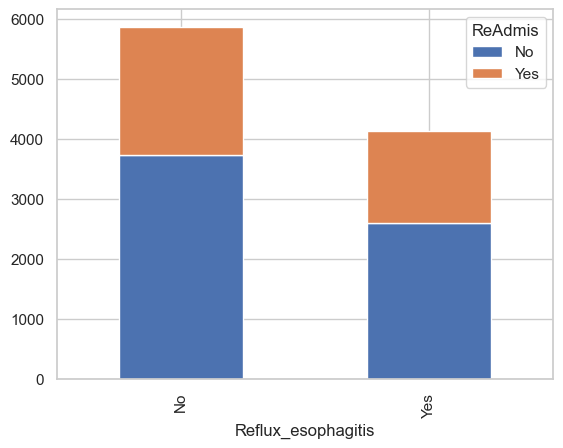

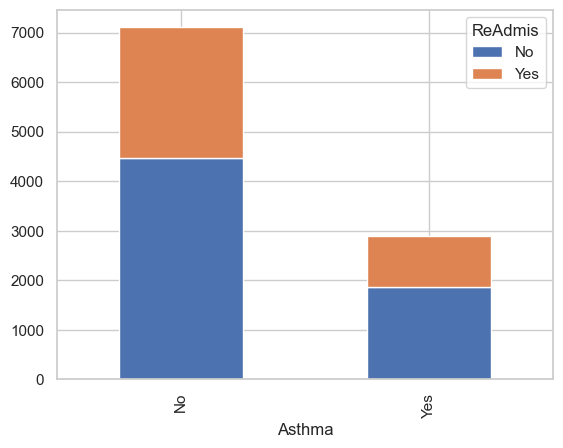

In [126]:
tbl = pd.pivot_table(df.groupby(['Area','ReAdmis']).size().reset_index(), values=0, index='Area', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Marital','ReAdmis']).size().reset_index(), values=0, index='Marital', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(), values=0, index='Gender', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Soft_drink','ReAdmis']).size().reset_index(), values=0, index='Soft_drink', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Initial_admin','ReAdmis']).size().reset_index(), values=0, index='Initial_admin', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(), values=0, index='HighBlood', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(), values=0, index='Stroke', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(), values=0, index='Complication_risk', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(), values=0,index='Overweight', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(), values=0, index='Arthritis', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(), values=0, index='Diabetes', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(), values=0, index='Hyperlipidemia',columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(), values=0, index='BackPain', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(), values=0, index='Anxiety', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(), values=0, index='Allergic_rhinitis', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(), values=0,index='Reflux_esophagitis', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(), values=0, index='Asthma', columns=['ReAdmis'], aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

In [127]:
df.groupby(target).mean().round(2).T

C:\Users\nsgoo\AppData\Local\Temp\ipykernel_4668\744883606.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(target).mean().round(2).T


ReAdmis,No,Yes
Children,2.06,2.16
Age,53.26,53.94
Income,40740.26,40059.52
VitD_levels,17.96,17.98
Doc_visits,5.01,5.01
Full_meals_eaten,1.01,0.99
vitD_supp,0.39,0.41
Initial_days,17.41,63.86


In [128]:
df[NumericalData].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.097,2.164,0.000,0.000,1.000,3.000,10.000
Age,10000.0,53.512,20.639,18.000,36.000,53.000,71.000,89.000
Income,10000.0,40490.495,28521.153,154.080,19598.775,33768.420,54296.402,207249.100
VitD_levels,10000.0,17.964,2.017,9.806,16.626,17.951,19.348,26.394
Doc_visits,10000.0,5.012,1.046,1.000,4.000,5.000,6.000,9.000
Full_meals_eaten,10000.0,1.001,1.008,0.000,0.000,1.000,2.000,7.000
vitD_supp,10000.0,0.399,0.629,0.000,0.000,0.000,1.000,5.000
Initial_days,10000.0,34.455,26.309,1.002,7.896,35.836,61.161,71.981


<Figure size 1000x2000 with 0 Axes>

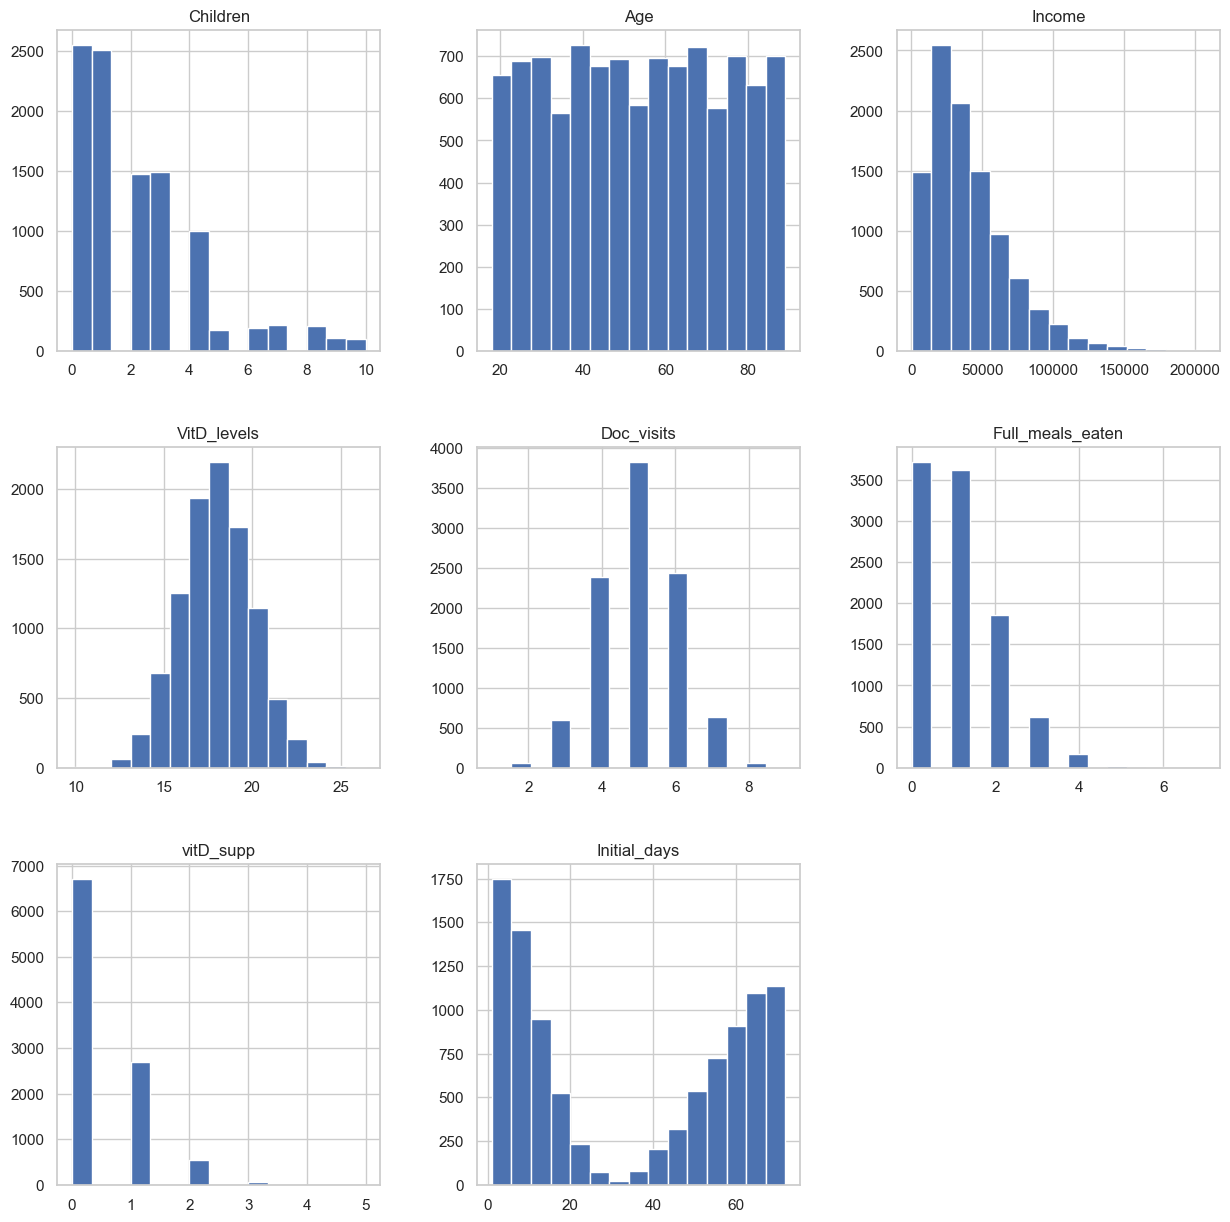

In [129]:
fig = plt.figure(figsize=(10, 20))
ax = df[NumericalData].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

In [130]:
target = 'ReAdmis_Yes'

In [131]:
for c in CategoricalData:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']


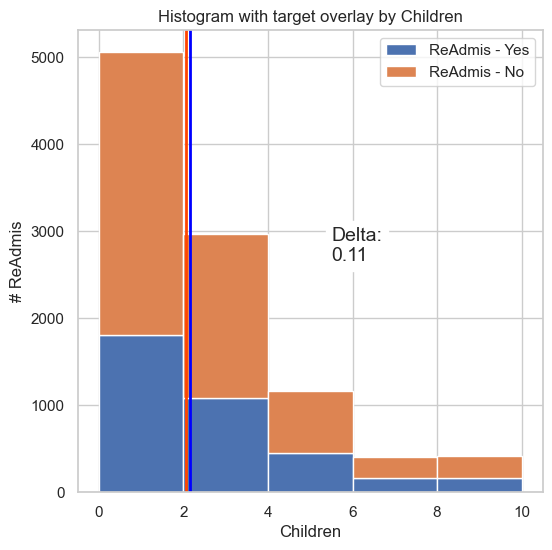

In [132]:
plot_histogram('Children')

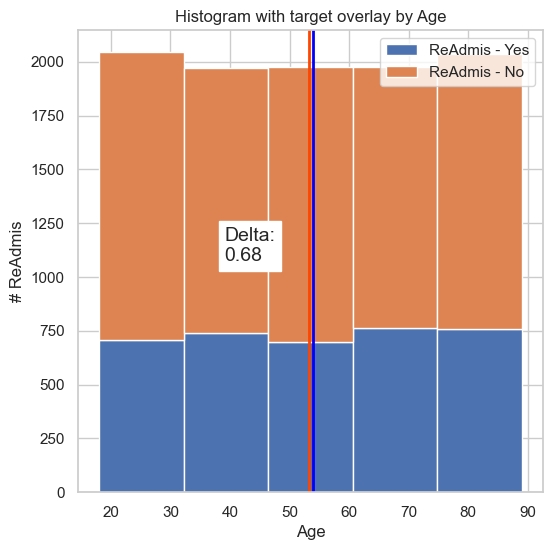

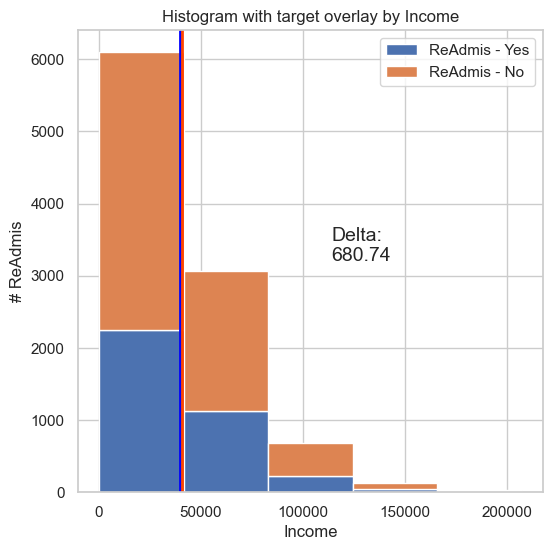

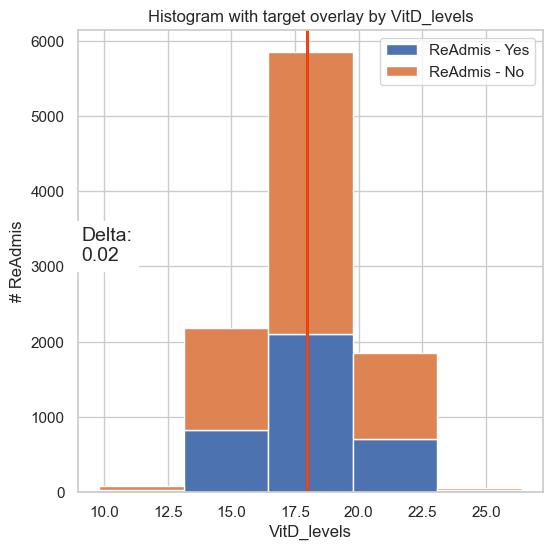

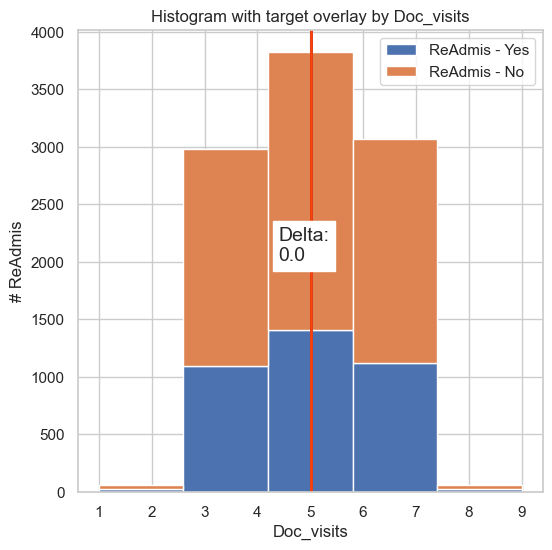

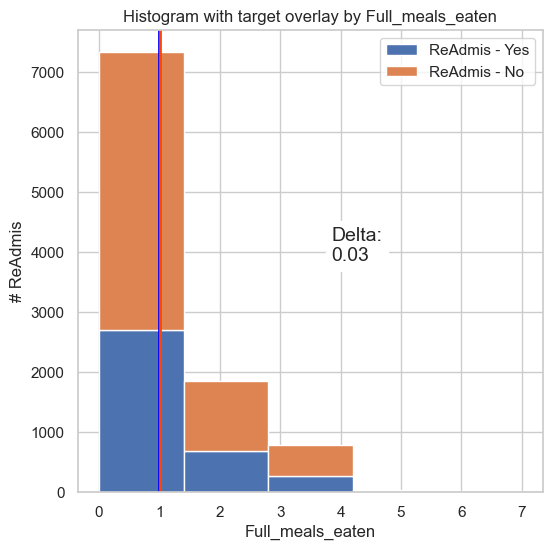

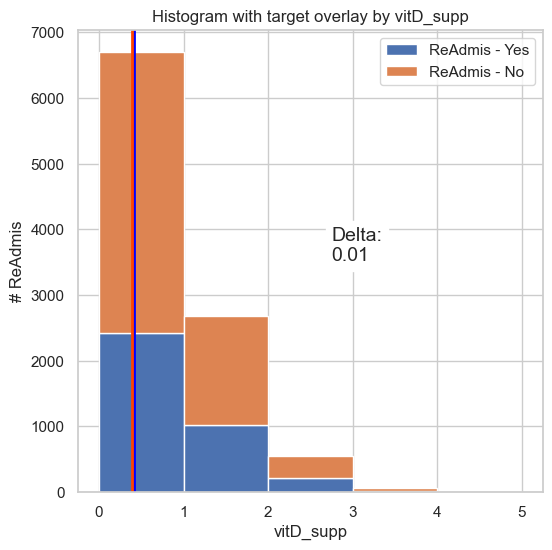

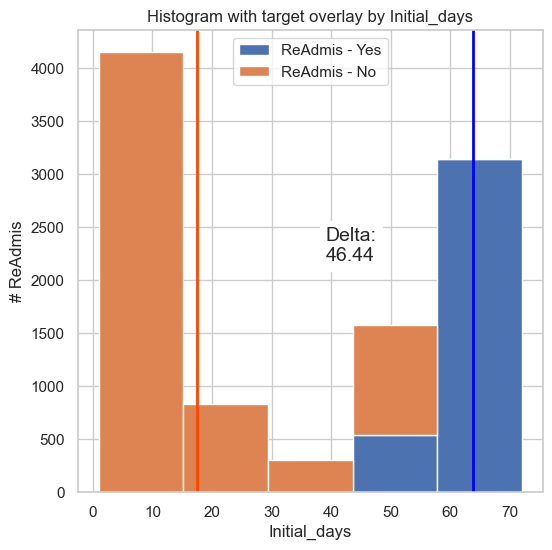

In [133]:
plot_histogram('Age')
plot_histogram('Income')
plot_histogram('VitD_levels')
plot_histogram('Doc_visits')
plot_histogram('Full_meals_eaten')
plot_histogram('vitD_supp')
plot_histogram('Initial_days')

In [134]:
cols_to_be_removed = ['ReAdmis_No']
print('data to be removed: {}'.format(cols_to_be_removed))

data to be removed: ['ReAdmis_No']


In [135]:
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
        print('Data named [{}] has been removed.'.format(c))

In [136]:
os = SMOTETomek(random_state=0)
X = df.loc[:, df.columns != 'ReAdmis_Yes']
y = df.loc[:, df.columns == 'ReAdmis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['ReAdmis_Yes'])

In [137]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no ReAdmis in oversampled data ",len(os_data_y[os_data_y['ReAdmis_Yes']==0]))
print("Number of ReAdmis",len(os_data_y[os_data_y['ReAdmis_Yes']==1]))
print("Proportion of no ReAdmis data in oversampled data is ",len(os_data_y[os_data_y['ReAdmis_Yes']==0])/len(os_data_X))
print("Proportion of ReAdmis data in oversampled data is ",len(os_data_y[os_data_y['ReAdmis_Yes']==1])/len(os_data_X))

length of oversampled data is  8362
Number of no ReAdmis in oversampled data  4181
Number of ReAdmis 4181
Proportion of no ReAdmis data in oversampled data is  0.5
Proportion of ReAdmis data in oversampled data is  0.5


In [138]:
data_final_vars=df.columns.values.tolist()
y=[target]
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
features =[]
print('The following features are selected:')
for i in range(os_data_X.shape[1]):
    if rfe.support_[i] == True:
        features.append(os_data_X.columns[i])
        print('Column: %d, Rank: %.3f, Feature: %s' %
            (i, rfe.ranking_[i],
                os_data_X.columns[i]))

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

The following features are selected:
Column: 6, Rank: 1.000, Feature: vitD_supp
Column: 7, Rank: 1.000, Feature: Initial_days
Column: 12, Rank: 1.000, Feature: Gender_Nonbinary
Column: 14, Rank: 1.000, Feature: Initial_admin_Emergency Admission
Column: 15, Rank: 1.000, Feature: Initial_admin_Observation Admission
Column: 16, Rank: 1.000, Feature: HighBlood_Yes
Column: 17, Rank: 1.000, Feature: Stroke_Yes
Column: 18, Rank: 1.000, Feature: Complication_risk_Low
Column: 21, Rank: 1.000, Feature: Arthritis_Yes
Column: 22, Rank: 1.000, Feature: Diabetes_Yes
Column: 25, Rank: 1.000, Feature: Anxiety_Yes
Column: 26, Rank: 1.000, Feature: Allergic_rhinitis_Yes
Column: 27, Rank: 1.000, Feature: Reflux_esophagitis_Yes
Column: 28, Rank: 1.000, Feature: Asthma_Yes


c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
X=os_data_X[features] # from RFE above
Xc = sm.add_constant(X) # reset
y=os_data_y[target]
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 14
                                    Results: Logit
Model:                        Logit                    Pseudo R-squared:         inf   
Dependent Variable:           ReAdmis_Yes              AIC:                      inf   
Date:                         2022-11-08 00:11         BIC:                      inf   
No. Observations:             8362                     Log-Likelihood:           -inf  
Df Model:                     14                       LL-Null:                  0.0000
Df Residuals:                 8347                     LLR p-value:              1.0000
Converged:                    1.0000                   Scale:                    1.0000
No. Iterations:               14.0000                                                  
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.    z 

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avai

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


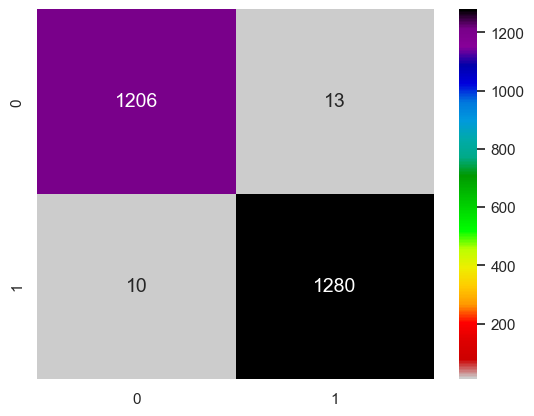

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted), index=range(2),columns=range(2))
axes = sb.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [141]:
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total ))

Correct predictions on diagonal: 2486 (99%)
Incorrect predictions off diagonal: 23 (1%)


In [142]:
get_top_abs_correlations(X, 20)

Initial_admin_Emergency Admission  Initial_admin_Observation Admission    0.456166
Initial_days                       HighBlood_Yes                          0.106127
                                   Allergic_rhinitis_Yes                  0.098254
                                   Diabetes_Yes                           0.096010
                                   Asthma_Yes                             0.094654
                                   Initial_admin_Observation Admission    0.093312
                                   Initial_admin_Emergency Admission      0.092578
                                   Anxiety_Yes                            0.085780
                                   Arthritis_Yes                          0.083523
                                   Reflux_esophagitis_Yes                 0.079881
                                   Stroke_Yes                             0.077131
                                   Complication_risk_Low                  0.068469
High

In [143]:
features.remove('Reflux_esophagitis_Yes') # high p-value
X=os_data_X[features]
y=os_data_y[target]
Xc = sm.add_constant(X) # reset
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 14
                                    Results: Logit
Model:                        Logit                    Pseudo R-squared:         inf   
Dependent Variable:           ReAdmis_Yes              AIC:                      inf   
Date:                         2022-11-08 00:11         BIC:                      inf   
No. Observations:             8362                     Log-Likelihood:           -inf  
Df Model:                     13                       LL-Null:                  0.0000
Df Residuals:                 8348                     LLR p-value:              1.0000
Converged:                    1.0000                   Scale:                    1.0000
No. Iterations:               14.0000                                                  
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.    z 

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avai

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


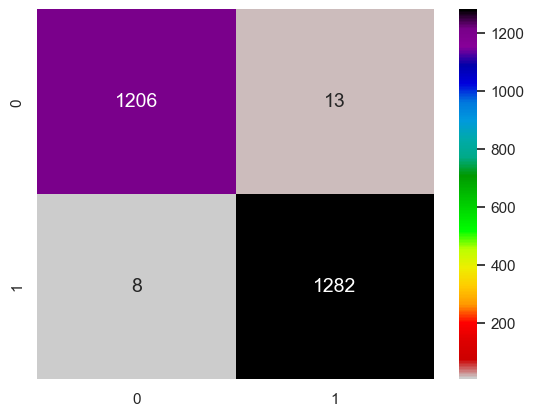

In [144]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted), index=range(2),columns=range(2))
axes = sb.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [145]:
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total ))

Correct predictions on diagonal: 2488 (99%)
Incorrect predictions off diagonal: 21 (1%)


In [146]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1219
           1       0.99      0.99      0.99      1290

    accuracy                           0.99      2509
   macro avg       0.99      0.99      0.99      2509
weighted avg       0.99      0.99      0.99      2509



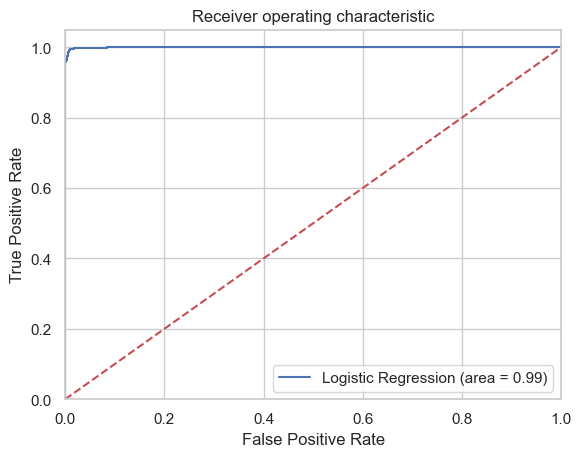

In [147]:
logit_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test) [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [148]:
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = result.summary2().tables[1]
print('Estimate [{}] as L = '.format(result.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print(' {:+.3f} x ( {} ) '.format(i[1],i[0]))

Logit: 0.99
Estimate [ReAdmis_Yes] as L = 
 -75.241 x ( const ) 
 -0.293 x ( vitD_supp ) 
 +1.403 x ( Initial_days ) 
 -0.115 x ( Gender_Nonbinary ) 
 +1.635 x ( Initial_admin_Emergency Admission ) 
 -0.267 x ( Initial_admin_Observation Admission ) 
 +0.578 x ( HighBlood_Yes ) 
 +1.442 x ( Stroke_Yes ) 
 -1.698 x ( Complication_risk_Low ) 
 -1.378 x ( Arthritis_Yes ) 
 +0.431 x ( Diabetes_Yes ) 
 -1.442 x ( Anxiety_Yes ) 
 -0.375 x ( Allergic_rhinitis_Yes ) 
 -1.568 x ( Asthma_Yes ) 


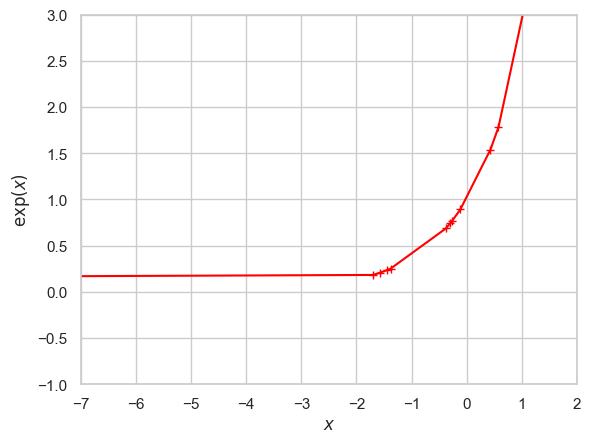

In [149]:
import matplotlib.pyplot as plt
X_coeff = []
for i in equation.itertuples():
    X_coeff.append(i[1])
X_coeff.sort()
x = X_coeff
y = np.exp(x)
plt.figure()
plt.plot(X_coeff, y, color="red", marker="+")
plt.xlim([-7.0, 2.0])
plt.ylim([-1.0, 3.0])
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()